### Minimizing Churn Rate

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
dataset = pd.read_csv('churn_data.csv')
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
# shape of data
dataset.shape

(27000, 31)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

In [5]:
# Missing values
dataset.isnull().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [6]:
# Missing values
dataset.isnull().sum()[dataset.isnull().sum()> 0 ] 

age                  4
credit_score      8031
rewards_earned    3227
dtype: int64

We have three columns with missing values, age has very few missing values so we can simple remove the rows tha has a missing value. For credit_score and rewards_earned, they have high missing values, we can drop them.

In [7]:
# drop the rows with missing values in age
dataset = dataset[pd.notnull(dataset['age'])]

# drop the columns credit_score and rewards_earned
dataset = dataset.drop(['credit_score','rewards_earned'], axis = 1)

### Histograms

In [8]:
# drop user and churn
dataset2 = dataset.drop(['user', 'churn'], axis = 1)

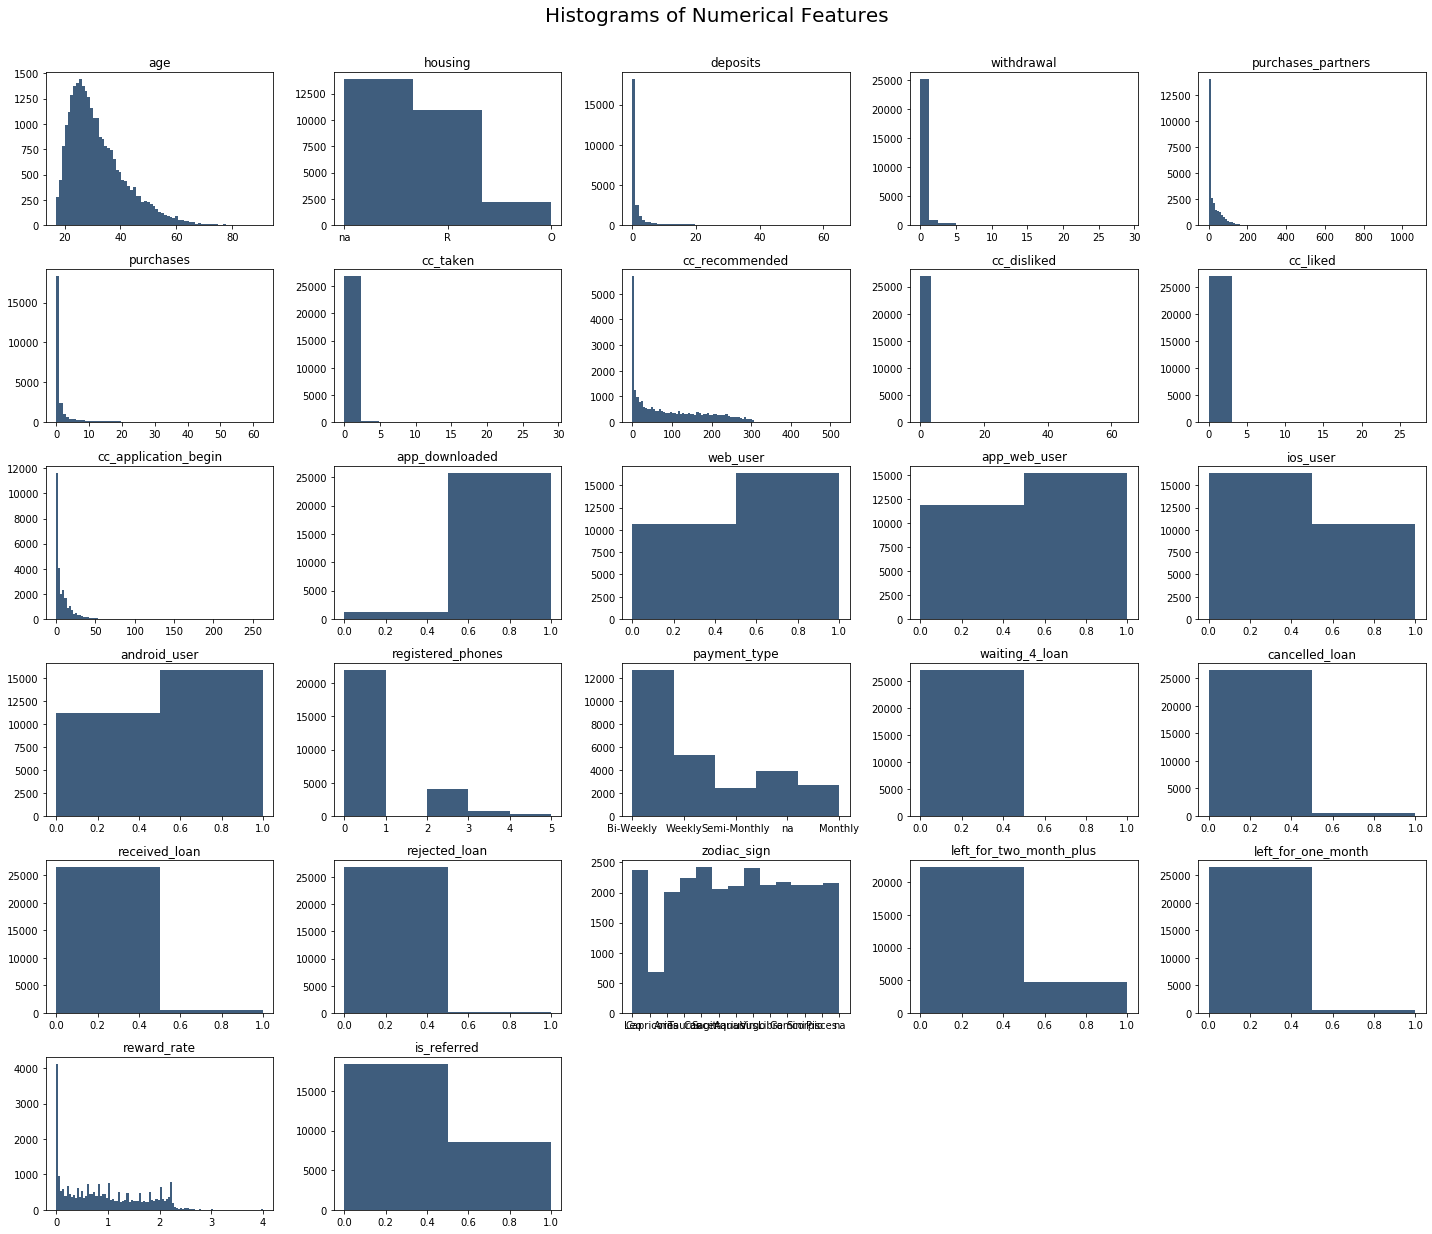

In [9]:
fig = plt.figure(figsize=(20,18))
plt.suptitle('Histograms of Numerical Features', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 5, i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    # control the bins
    vals = len(dataset2.iloc[:,i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins = vals, color = "#3F5D7D")
    
plt.tight_layout(rect = [0,0.03,1,0.95])

### Pie Charts

For Binary Features and categoriacal features

In [10]:
# selecting binary and categorical features
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

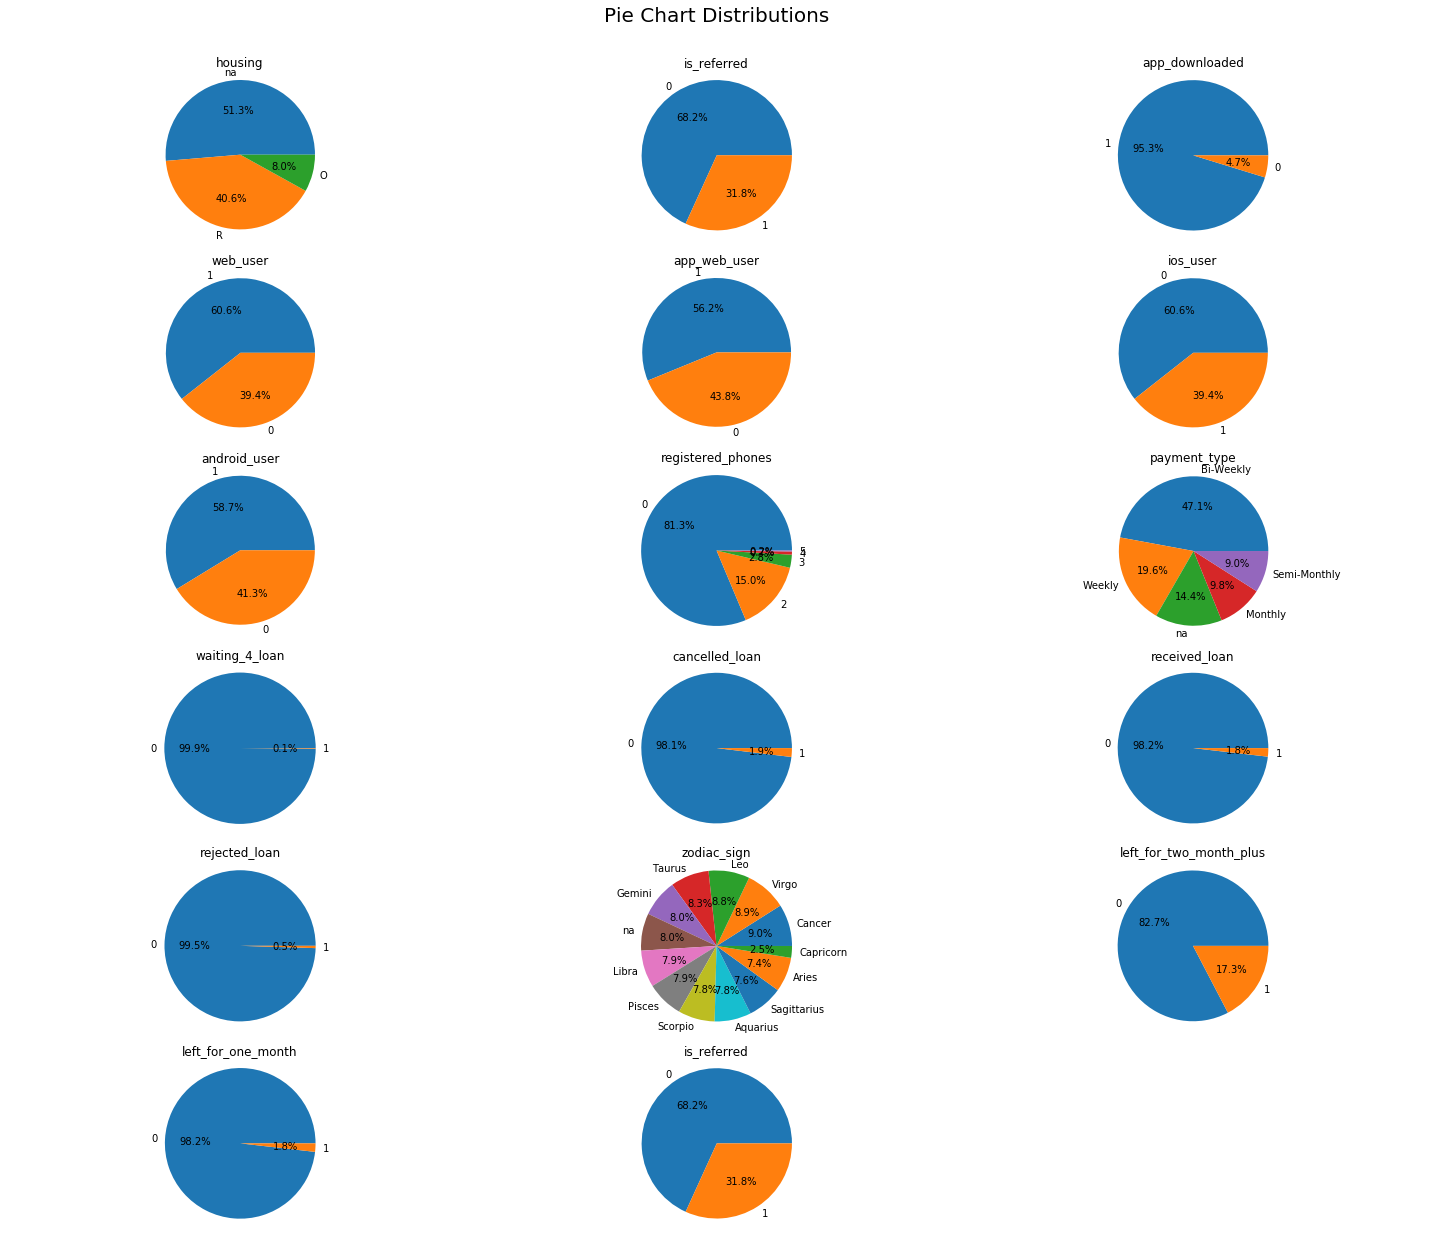

In [11]:
fig = plt.figure(figsize=(20,18))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i])
    values = dataset2.iloc[:, i].value_counts(normalize = True).values
    index = dataset2.iloc[:, i].value_counts(normalize = True).index
                
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout(rect = [0,0.03,1,0.95])

We see from the piechart that few features have very uneven distribution, where almost all the values are composed of a sigle class, which is not good for modeling. We will check how is the distribution of such features impacting the outcome churn.

In [12]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()


0    27
1     8
Name: churn, dtype: int64

In [13]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()


1    274
0    234
Name: churn, dtype: int64

In [14]:
dataset[dataset2.received_loan == 1].churn.value_counts()


1    292
0    199
Name: churn, dtype: int64

In [15]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()


1    107
0     25
Name: churn, dtype: int64

In [16]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

From the count distribution we see that there is no big biases with the lower representative classes in the unvevenly distributed features. 

### Correlation plot

#### correlation with the Response

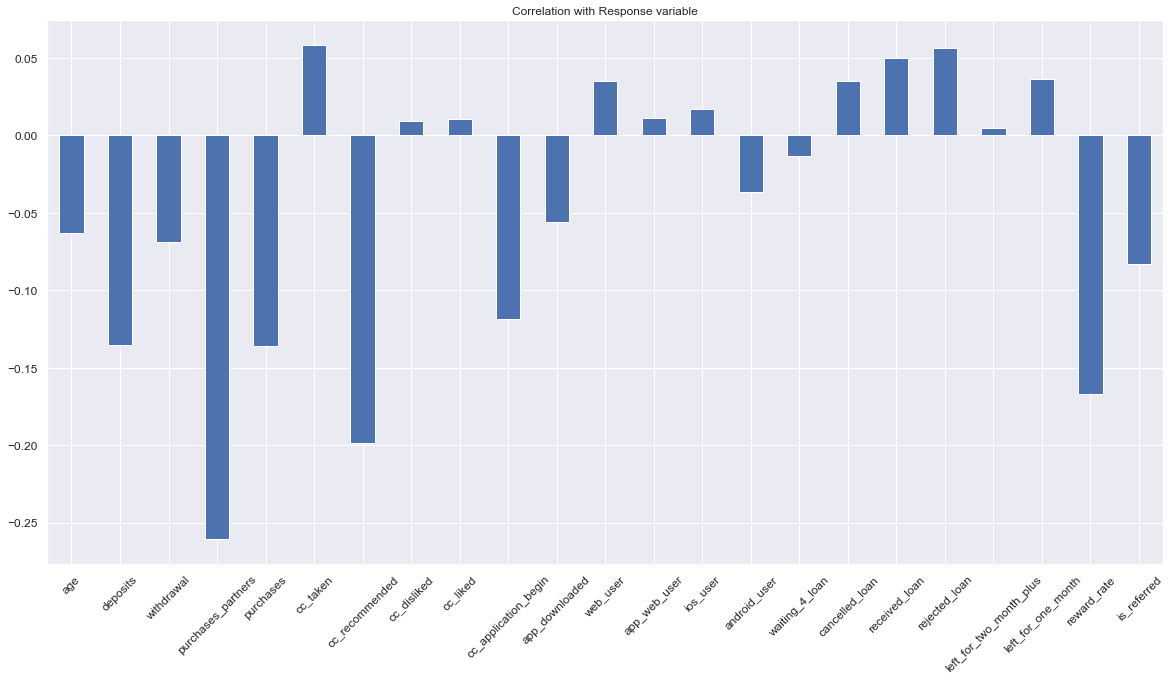

In [17]:
sns.set()
dataset.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign','churn','user']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 12, rot = 45,
              grid = True)

#### Correlation Matrix

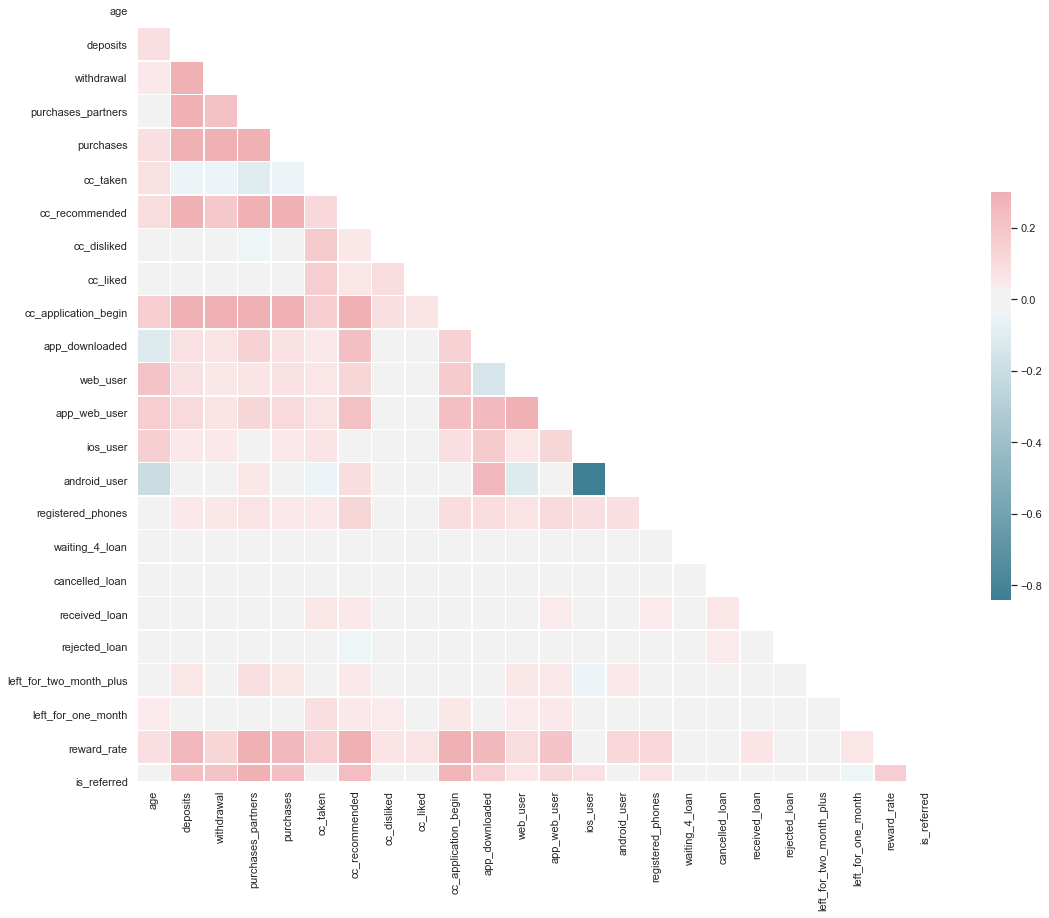

In [18]:
# compute correlation matrix
cor_mat = dataset.drop(['user','churn'], axis = 1).corr()

# Generate mask for the upper traingle
mask = np.zeros_like(cor_mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the correlation matirx
sns.set(style='white')
cmap = sns.diverging_palette(220,10, as_cmap = True)

plt.figure(figsize=(18,15))
sns.heatmap(cor_mat, mask = mask, cmap = cmap, vmax=0.3, center=0, square = True, linewidths=.5, cbar_kws={'shrink':.5})


In [19]:
#dropping app_web_user column as it is dependent on other two columns app_download and web_user, so there may be repetition

dataset = dataset.drop('app_web_user', axis = 1)

#### One hot encoding

In [20]:
user_identifier = dataset['user']
dataset = dataset.drop('user', axis = 1)

In [21]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train test split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('churn', axis = 1), dataset['churn'], test_size = 0.3,
                                                   random_state = 0)

In [23]:
dataset.churn.value_counts()

0    15822
1    11174
Name: churn, dtype: int64

#### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [25]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0.978955,-0.367918,-0.295402,-0.661106,-0.367450,-0.162997,-1.045116,-0.061139,-0.067209,-0.661497,...,-0.156719,-0.295651,-0.31166,-0.293954,-0.293316,-0.290005,-0.293954,-0.298709,-0.314208,-0.290541
1,-0.025542,-0.149539,-0.295402,0.387468,-0.144953,-0.162997,0.020839,-0.061139,-0.067209,-0.101738,...,-0.156719,-0.295651,-0.31166,-0.293954,-0.293316,-0.290005,-0.293954,-0.298709,-0.314208,-0.290541
2,0.577156,-0.367918,-0.295402,0.154452,-0.367450,-0.162997,0.211589,-0.061139,-0.067209,-0.101738,...,-0.156719,-0.295651,-0.31166,-0.293954,-0.293316,-0.290005,-0.293954,-0.298709,-0.314208,-0.290541
3,-0.929589,-0.258728,0.661275,-0.567899,-0.256201,-0.162997,-0.416764,-0.061139,-0.067209,0.138159,...,-0.156719,-0.295651,-0.31166,-0.293954,-0.293316,-0.290005,-0.293954,-0.298709,-0.314208,-0.290541
4,1.079405,-0.367918,-0.295402,-0.661106,-0.367450,-0.162997,-1.045116,-0.061139,-0.067209,-0.661497,...,-0.156719,-0.295651,-0.31166,-0.293954,-0.293316,-0.290005,-0.293954,-0.298709,3.182605,-0.290541


### Modeling

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# prediction 
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

#### Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ad43169320>)

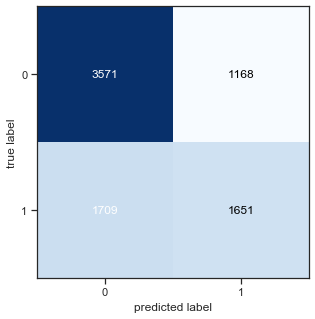

In [29]:
from mlxtend.plotting import plot_confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, figsize=(8, 5))

In [30]:
# accuracy
accuracy_score(y_test, y_pred)

0.6447709593777009

In [31]:
# precision
precision_score(y_test,y_pred)

0.5856686768357574

In [32]:
# Recall
recall_score(y_test, y_pred)

0.4913690476190476

In [33]:
# F1 score
f1_score(y_test, y_pred)

0.5343906781032529

In [34]:
# AUC score
roc_auc_score(y_test, y_prob)

0.6876256983591073

### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

auc_scores = cross_val_score(estimator=classifier, X=X_train, y = y_train, cv = 10, scoring='roc_auc', n_jobs = 1)

In [36]:
avg_auc = round(auc_scores.mean(),2)
print(f'CV AUC score.: {avg_auc}')

CV AUC score.: 0.7


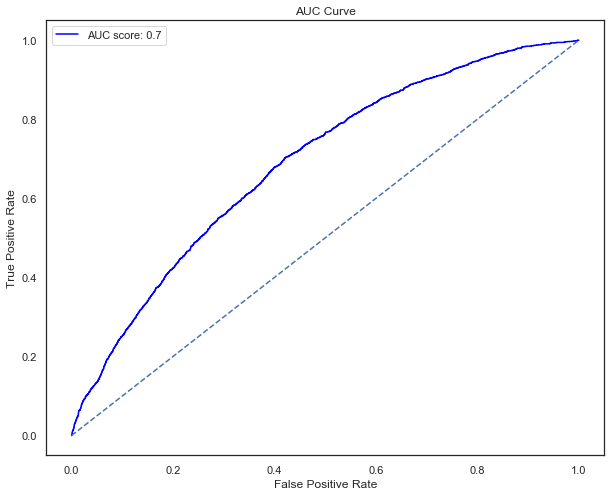

In [37]:
# AUC curve
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'blue', label = f'AUC score: { avg_auc}')
plt.plot([0,1], '--' )
plt.title('AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### Analyzing Coefficents

In [38]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['Features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['Coefficients'])
          ], axis = 1)

,Features,Coefficients
0,age,-0.166794
1,deposits,0.332891
2,withdrawal,0.053855
3,purchases_partners,-0.789543
4,purchases,-0.478298
5,cc_taken,0.063970
6,cc_recommended,0.109323
7,cc_disliked,-0.000946
8,cc_liked,-0.002252
9,cc_application_begin,0.017226


### Feature Selection

Recursive Feature Elimination

In [39]:
from sklearn.feature_selection import RFE

classifier = LogisticRegression()
rfe = RFE(classifier,20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [40]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False])

In [41]:
# select the features
features_selected = list(X_train.columns[rfe.support_])
print(features_selected)

['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'web_user', 'ios_user', 'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'reward_rate', 'housing_R', 'housing_na', 'payment_type_Weekly', 'zodiac_sign_Capricorn']


In [42]:
# train the model with the selected features
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[features_selected], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
# prediction 
y_pred = classifier.predict(X_test[features_selected])
y_prob = classifier.predict_proba(X_test[features_selected])[:,1]

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ad449baf28>)

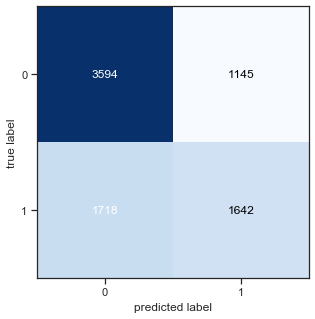

In [44]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, figsize=(8, 5))

In [45]:
auc = round(roc_auc_score(y_test, y_prob),2)
print(f'AUC score.: {auc}')

AUC score.: 0.69


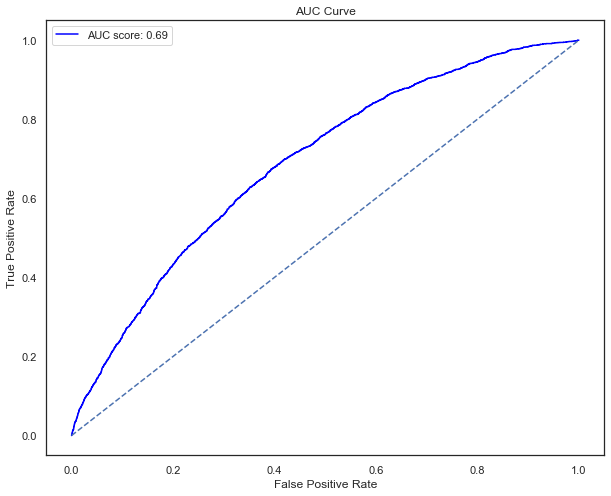

In [46]:
# AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'blue', label = f'AUC score: { auc}')
plt.plot([0,1], '--' )
plt.title('AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [47]:
# Final Coefficients
pd.concat([pd.DataFrame(X_train[features_selected].columns, columns = ['Features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['Coefficients'])
          ], axis = 1)

,Features,Coefficients
0,age,-0.163030
1,deposits,0.345693
2,withdrawal,0.059489
3,purchases_partners,-0.777388
4,purchases,-0.485729
5,cc_taken,0.066289
6,cc_recommended,0.123619
7,web_user,0.135844
8,ios_user,0.070725
9,registered_phones,0.095688


In [48]:
# Prediction vs Actual
results = pd.concat([user_identifier,y_test], axis = 1).dropna()
results['Predicted'] = y_pred
results.reset_index(drop = True)


,user,churn,Predicted
0,61353,1.0,0
1,67679,0.0,0
2,21269,0.0,0
3,20839,0.0,1
4,30419,1.0,0
...,...,...,...
8094,24442,0.0,0
8095,24291,1.0,1
8096,23740,0.0,0
8097,47663,1.0,0
